In [1]:
#The goal is to decompose the swap gate into 3iswaps and 3x rotation gates
import cirq
import numpy as np
from cirq.contrib.svg import SVGCircuit, circuit_to_svg

q = cirq.LineQubit.range(2)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


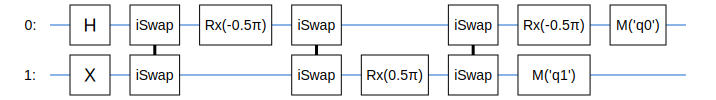

In [2]:
c = cirq.Circuit()

#Adjust initial qubit values to test if it works in all cases
c.append(cirq.H(q[0]))
c.append(cirq.X(q[1]))

#CIRCUIT
c.append(cirq.ISWAP(q[0],q[1]))

#Rotation
c.append(cirq.rx(-np.pi/2)(q[0]))

c.append(cirq.ISWAP(q[0],q[1]))

#Rotation
c.append(cirq.rx(np.pi/2)(q[1]))

c.append(cirq.ISWAP(q[0],q[1]))

#Rotation
c.append(cirq.rx(-np.pi/2)(q[0]))

#MEASURE
c.append(cirq.measure(q[0],key='q0'))
c.append(cirq.measure(q[1],key='q1'))

SVGCircuit(c)

In [3]:
sim = cirq.Simulator()
samples=sim.run(c, repetitions=1000)
print('Qubit 0:',samples.histogram(key='q0'))
print('Qubit 1:',samples.histogram(key='q1'))

Qubit 0: Counter({1: 1000})
Qubit 1: Counter({0: 513, 1: 487})
